# NAIVE BAYES IMPLEMENTATION

In [1]:
import pandas as pd
from pandas import read_csv, DataFrame
import random
import numpy as np


"Naive" implementation of the __naive bayes algorithm__, with all attributes __categorical__.

##### For comvenience purposes i'll be using dicts to store and perfom operations 


In [25]:
def NaiveBayesClassifierTrainer(Traindf):
     #dividing into 2 data frames for each class label
    greaterThanClass = Traindf[Traindf['income_class'] == " >50K"]              
    lessThanEquaClass = Traindf[Traindf['income_class'] == " <=50K"]
    
    count_Greater50k = len(greaterThanClass)                    #taking count of dataframe 1
    count_LessThanEqual50k = len(lessThanEquaClass)        #taking count of dataframe 2

    #calculating the prior probabilities 
    prob_Greater50k = float(count_Greater50k)/float(len(Traindf))
    prob_LessThanEqual50k = float(count_LessThanEqual50k)/float(len(Traindf))
    #in dict form
    classProb = {" >50K": prob_Greater50k, " <=50K": prob_LessThanEqual50k }
    
    dfGreatDict = {}
    dfLessDict = {}
    for i in greaterThanClass:
        if i != 'income_class':
            # adding to greater than dictionary
            greatSeries = greaterThanClass[i].value_counts()
            thisDict = greatSeries.to_dict()
            thisDict.update((k, float(v)/float(count_Greater50k)) for k, v in thisDict.items())
            dfGreatDict[i] = thisDict

            # adding to less than dictionary
            lessSeries = lessThanEquaClass[i].value_counts()
            lessDict = lessSeries.to_dict()
            lessDict.update((k, float(v)/float(count_LessThanEqual50k)) for k, v in lessDict.items())
            dfLessDict[i] = lessDict
    likelihood = {}
    likelihood[" >50K"] = dfGreatDict
    likelihood[" <=50K"] = dfLessDict
    
    return likelihood, classProb



this function used to test and validate the model.

In [32]:
def testing(likelihood, classProb, Testdf):
    

    myPos = {}
    true = 0
    false = 0
    total = 0
    t = 0
    f = 0
    print(classProb)
    for record in Testdf.iterrows():
        total += 1
        post = 1
        for k in likelihood:
            for col in Testdf:
                if col != "income_class":
                    value = record[1][col]
                    if value in likelihood[k][col]:
                        post *= likelihood[k][col][value]

            post *= classProb[k]
            myPos[k] = post
        # get the classifier labels
        if myPos[" >50K"] > myPos[" <=50K"]:
            max_label = " >50K"
        else:
            max_label = " <=50K"
            
        #checking the true value of the prediction
        trueLabel = record[1]['income_class']
        if trueLabel.strip() == max_label.strip():
            false+= 1
        else:
            true+= 1
        print(trueLabel,max_label)
    print ("no of True Positives: {}".format(true))
    print ("no of False Positives: {}".format(false))
    print ("Total: {}".format(total))
    accuracyCalculator = float(true)/float(total)*100
    
    print(accuracyCalculator)
    return accuracyCalculator

#### Model validation 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/dataProccesed2.csv"
data = pd.read_csv(import_source)
dataf=data[['education','martial_status','workclass','occupation','RelationShip',
             'race','sex','native_country','age-binned','fnlwgt-binned',
             'education_num-binned','capital_gain-binned','capital_loss-binned',
             'hours_per_week-binned','income_class']].copy()
  
def main():
    dataf['split'] = np.random.randn(dataf.shape[0], 1)
    msk = np.random.rand(len(dataf)) <= 0.7

    train = dataf[msk]
    validation = dataf[~msk]
    validation.to_csv('validation.csv', index=False)
    train.to_csv('train.csv', index=False)
    likelihood, classP=NaiveBayesClassifierTrainer(train)
    testing(likelihood, classP, validation)

main()

{' >50K': 0.23999651294568913, ' <=50K': 0.7600034870543109}
no of True Positives: 7284
no of False Positives: 2335
Total: 9619
75.7251273521156


#### Optimising the model

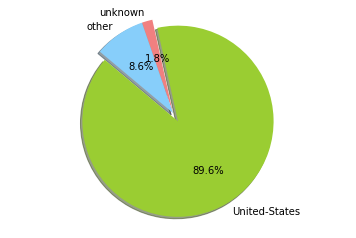

In [28]:
import matplotlib.pyplot as plt
# Data to plot
labels =['United-States','unknown','other' ]
sizes = [29170,583,2808]
colors = [ 'yellowgreen', 'lightcoral','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

clearly, w.r.t native country, the US accounts to about 90% of the sample. lets'see whether it has some biasness within our model.

In [29]:
dataf=data[['education','martial_status','workclass','occupation','RelationShip',
             'race','sex','age-binned','fnlwgt-binned',
             'education_num-binned','capital_gain-binned','capital_loss-binned',
             'hours_per_week-binned','income_class']].copy()
main()

{' >50K': 0.2404083069341781, ' <=50K': 0.7595916930658219}
no of True Positives: 7456
no of False Positives: 2377
Total: 9833
75.82629919658294


We can confidently say that it has no impact on the predictions as the accuracy didnt change much.Also it can be seen that it doesn't make much of a difference so we can drop it, now lets look at __education__ vs __education num__, somehow this two attributes represents one thing and therefore droping education num won't have any effect  on the model. Simillarly for __fnlweight__ , __see below__

In [30]:
dataf=data[['education','martial_status','workclass','occupation','RelationShip',
             'race','sex','age-binned','fnlwgt-binned','capital_gain-binned','capital_loss-binned',
             'hours_per_week-binned','income_class']].copy()
main()

{' >50K': 0.24024757006494354, ' <=50K': 0.7597524299350564}
no of True Positives: 7289
no of False Positives: 2329
Total: 9618
75.78498648367645


__REPORT ON ALGORITHIM TRAINING AND VALIDATION__



#### Testing

In [33]:
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/dataProccesedtest2.csv"
data1 = pd.read_csv(import_source)
datat=data1[['education','martial_status','workclass','occupation','RelationShip',
             'race','sex','age-binned','fnlwgt-binned','capital_gain-binned','capital_loss-binned',
             'hours_per_week-binned','income_class']].copy()
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/dataProccesed2.csv"
data = pd.read_csv(import_source)
dataf=data[['education','martial_status','workclass','occupation','RelationShip',
             'race','sex','native_country','age-binned','fnlwgt-binned',
             'education_num-binned','capital_gain-binned','capital_loss-binned',
             'hours_per_week-binned','income_class']].copy()
  
def main():
    dataf['split'] = np.random.randn(dataf.shape[0], 1)
    msk = np.random.rand(len(dataf)) <= 0.7

    train = dataf[msk]
    test = dataf[~msk]
    test.to_csv('test.csv', index=False)
    train.to_csv('train.csv', index=False)
    likelihood, classP=NaiveBayesClassifierTrainer(train)
    testing(likelihood, classP, datat)

main()


{' >50K': 0.24112948980927856, ' <=50K': 0.7588705101907214}
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >5

 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >5

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K. 

 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.

 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >

 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50

 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 

 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >

 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >5

 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50

 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 

 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=5

 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K


 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K. 

 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50

 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=50K.  >50K
 >50K.  >50K
 <=5